## Data Dictionary 

In [1]:
# Please import kid.csv

Here are the variables that magazine reseller has on each customer from third-party sources:
Household Income (Income; rounded to the nearest $1,000.00)

Gender (IsFemale = 1 if the person is female, 0 otherwise)

Marital Status (IsMarried = 1 if married, 0 otherwise)

College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)

Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)

Retired (IsRetired = 1 if retired, 0 otherwise)

Not employed (Unemployed = 1 if not employed, 0 otherwise)

Length of Residency in Current City (ResLength; in years)

Dual Income if Married (Dual = 1 if dual income, 0 otherwise)

Children (Minors = 1 if children under 18 are in the household, 0 otherwise)

Home ownership (Own = 1 if own residence, 0 otherwise)

Resident type (House = 1 if the residence is a single-family house, 0 otherwise)

Race (White = 1 if the race is white, 0 otherwise)

Language (English = 1 is the primary language in the household is English, 0 otherwise)

With this dataset, we will be building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. At last, we’ll evaluate our model using the confusion matrix.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
kid = pd.read_csv('kid.csv')
kid.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [4]:
kid.isnull().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [5]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 18 columns):
Obs No.             673 non-null int64
Buy                 673 non-null int64
Income              673 non-null int64
Is Female           673 non-null int64
Is Married          673 non-null int64
Has College         673 non-null int64
Is Professional     673 non-null int64
Is Retired          673 non-null int64
Unemployed          673 non-null int64
Residence Length    673 non-null int64
Dual Income         673 non-null int64
Minors              673 non-null int64
Own                 673 non-null int64
House               673 non-null int64
White               673 non-null int64
English             673 non-null int64
Prev Child Mag      673 non-null int64
Prev Parent Mag     673 non-null int64
dtypes: int64(18)
memory usage: 94.7 KB


In [6]:
kid.groupby(['Buy']).count()

,Obs No.,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
Buy,,,,,,,,,,,,,,,,,
0,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548,548
1,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125


In [7]:
corr = kid.corr()

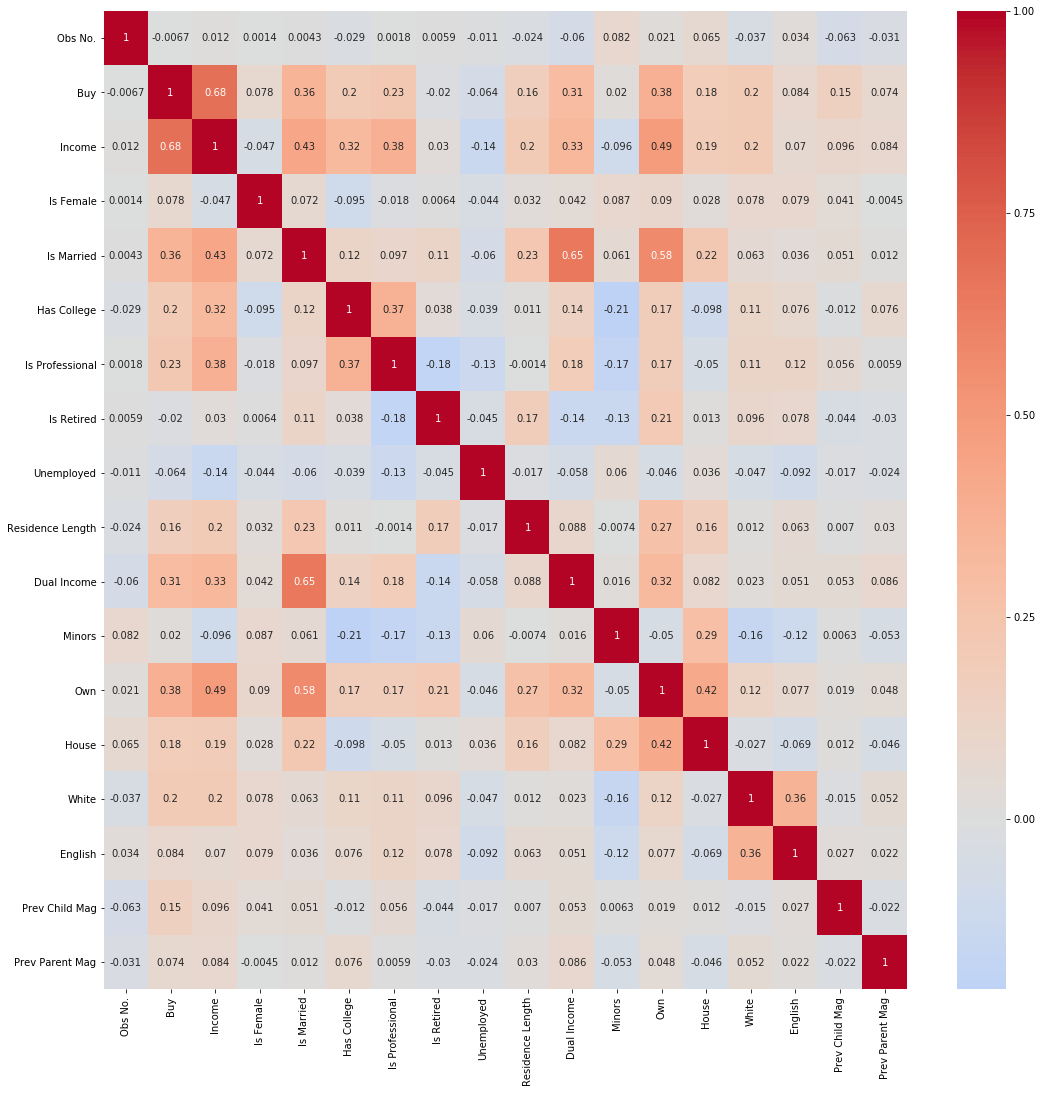

In [8]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(corr, center = 0, cmap="coolwarm", annot=True);

Correlation of 0.3 or higher:
- Income 0.68
- Is Married 0.36
- Dual Income 0.31
- Own 0.38

In [9]:
X = kid.ix[:,(2,4,10,12)].values
y = kid.ix[:,1].values

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


## Split training and test data

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [11]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

/Users/flori/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Confusion Matrix

In [12]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[108,   6],
       [  5,  16]])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       114
           1       0.73      0.76      0.74        21

    accuracy                           0.92       135
   macro avg       0.84      0.85      0.85       135
weighted avg       0.92      0.92      0.92       135

